# Pymaceuticals Inc.
---

### Analysis


- The tumor volume variance for treatments with Ketapril and Naftisol are significantly higher compared to most of the other drug regimens. 

- The Capomulin and Ramicane drug regimens demonstrated more efficacy (lower final tumor volume) compared to Infubinol and Ceftamin.

- There is positive correlation (0.84) between the mouse weight (g) and the average tumor volume (mm3) for the Capomulin drug regimen. 

- The sample had a normal distributed data in regards to the Capomulin, Ramicane and Ceftamin's drug regimens.   


### Prepare the Data

In [1]:
# dependencies 

from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np

In [2]:
# import and read data

Mouse_metadata_df = pd.read_csv("../Pymaceuticals/data/Mouse_metadata.csv")

Study_results_df = pd.read_csv("../Pymaceuticals/data/Study_results.csv")


In [3]:
Mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
Study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine data into a single dataset 

dataset = pd.merge(Study_results_df, Mouse_metadata_df, on="Mouse ID")

dataset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# checking the number of mices

mices_count = dataset["Mouse ID"].unique()
mices_count = pd.Series(mices_count).count()
mices_count

249

In [7]:
# getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate = dataset.loc[(dataset[["Timepoint","Mouse ID"]].duplicated()), :]["Mouse ID"]
duplicate


861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_dataset = dataset.set_index(["Mouse ID"])
new_dataset = new_dataset.drop(index="g989")
new_dataset = new_dataset.reset_index()
new_dataset


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in the clean DataFrame.

mice_check = new_dataset["Mouse ID"].unique()
mice_check = pd.Series(mice_check).count()
mice_check

248

###  Generate Summary Statistics

In [10]:
# Assign values to variables

mean = new_dataset[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").mean()
median = new_dataset[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").median()
var = new_dataset[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").var()
std = new_dataset[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").std()
sem = new_dataset[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen").sem()

In [11]:
# Rename columns accordingly 

mean = mean.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})
median = median.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})
var = var.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
std = std.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
sem = sem.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})

In [12]:
# Merge dfs

merge1 = pd.merge(mean, median, on="Drug Regimen")

In [13]:
merge2 = pd.merge(merge1, var, on="Drug Regimen")

In [14]:
merge3 = pd.merge(merge2, std, on="Drug Regimen")

In [15]:
merge4 = pd.merge(merge3, sem, on="Drug Regimen")

In [16]:
summary_stats = merge4

In [17]:
# Rename Summary Stats

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar Charts and Pie Charts

In [18]:
# Chart dataframe

drug_regimen = new_dataset["Drug Regimen"].value_counts()

In [19]:
drug_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [20]:
drug_regimen.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object')

In [21]:
drug_regimen.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

In [22]:
# Create a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

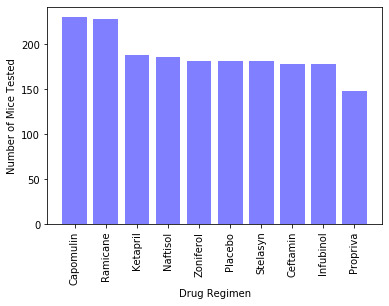

In [23]:
plt.bar(drug_regimen.index, drug_regimen.values, facecolor="blue", alpha=0.5, align="center")

plt.xlabel ("Drug Regimen")
plt.ylabel ("Number of Mice Tested")
plt.xticks(rotation=90)

In [24]:
# Create a bar plot showing the total number of timepoints for all mice tested for each drug regimen
# using pyplot is generated.

Text(0, 0.5, 'Number of Mice Tested')

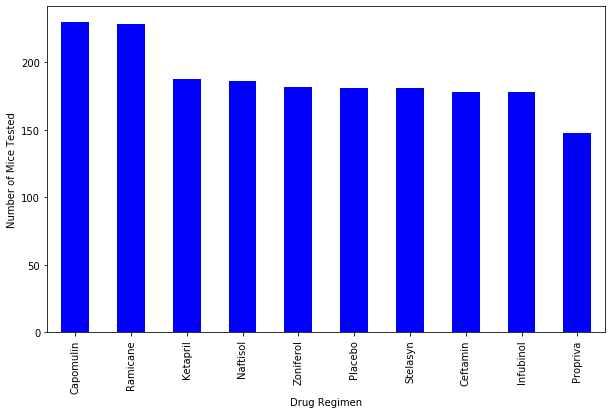

In [25]:
bar_chart = drug_regimen.plot(kind="bar", facecolor="blue", figsize=(10,6))

plt.xlabel ("Drug Regimen")
plt.ylabel ("Number of Mice Tested")


In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender = new_dataset["Sex"].value_counts()
mice_gender

Male      958
Female    922
Name: Sex, dtype: int64

Text(0.0, 1.0, 'Sex')

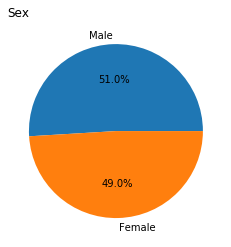

In [27]:
plt.pie(mice_gender, labels=mice_gender.index, autopct="%1.1f%%")
plt.title ("Sex", loc="left")

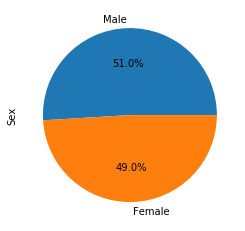

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender.plot(kind="pie", autopct='%1.1f%%')

### Quartiles, Outliers, and Boxplots

In [29]:
new_dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [30]:
# Start by getting the last (greatest) timepoint for each mouse

In [31]:
last_timepoint = pd.DataFrame(new_dataset["Timepoint"].groupby(new_dataset["Mouse ID"]).last())

In [32]:
last_timepoint = last_timepoint.rename(columns={"Timepoint":"Last Timepoint"})

In [33]:
last_timepoint = last_timepoint.reset_index()

In [34]:
last_timepoint

,Mouse ID,Last Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [35]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [36]:
new_merge = pd.merge(new_dataset, last_timepoint, on="Mouse ID", how="inner")

In [37]:
new_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [38]:
last_timepoint = new_merge.loc[(new_merge["Timepoint"] == new_merge["Last Timepoint"]), :]


In [39]:
last_timepoint = last_timepoint.reset_index()

In [40]:
last_timepoint

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,9,b128,45,38.982878,2,Capomulin,Female,9,22,45
1,10,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,18,g107,35,71.905117,0,Ketapril,Female,2,29,35
3,21,a457,10,49.783419,0,Ketapril,Female,11,30,10
4,30,c819,40,62.175705,1,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...,...
243,1844,t565,45,34.455298,0,Capomulin,Female,20,17,45
244,1854,i557,45,47.685963,1,Capomulin,Female,1,24,45
245,1864,m957,45,33.329098,1,Capomulin,Female,3,19,45
246,1869,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [41]:
selected_treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

In [42]:
tumor_volume = []
treatments = []

In [43]:
for treatment in selected_treatments:
    final_tumor_vol = last_timepoint.loc[last_timepoint["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    tumor_outliers = final_tumor_vol[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
    
    print(treatment, tumor_outliers)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

In [45]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

In [46]:
selected_treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

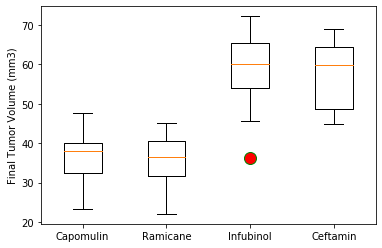

In [47]:
plt.boxplot(tumor_volume, labels=selected_treatments, flierprops=flierprops)
# plt.xticks(selected_treatments)
plt.ylabel ("Final Tumor Volume (mm3)")
plt.show()

### Line and Scatter Plots

In [48]:
new_dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [50]:
capomulin_l509 = new_dataset.loc[(new_dataset["Mouse ID"] == "l509"), :]

In [51]:
capomulin_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1708,l509,0,45.000000,0,Capomulin,Male,17,21
1709,l509,5,45.851193,0,Capomulin,Male,17,21
1710,l509,10,46.759074,0,Capomulin,Male,17,21
1711,l509,15,47.488599,1,Capomulin,Male,17,21
1712,l509,20,48.070452,2,Capomulin,Male,17,21
1713,l509,25,44.006257,2,Capomulin,Male,17,21
1714,l509,30,44.708055,2,Capomulin,Male,17,21
1715,l509,35,40.207289,2,Capomulin,Male,17,21
1716,l509,40,40.770813,2,Capomulin,Male,17,21
1717,l509,45,41.483008,3,Capomulin,Male,17,21


In [52]:
x_axis = capomulin_l509["Timepoint"]
y_axis = capomulin_l509["Tumor Volume (mm3)"]

Text(0, 0.5, 'Tumor Volume (mm3)')

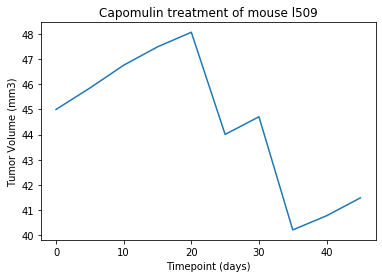

In [53]:
plt.plot(x_axis, y_axis)

plt.title ("Capomulin treatment of mouse l509")
plt.xlabel ("Timepoint (days)")
plt.ylabel ("Tumor Volume (mm3)")

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [55]:
capomulin = new_dataset.loc[(new_dataset["Drug Regimen"] == "Capomulin"), :]

In [56]:
capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [57]:
capomulin.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
mice_volumes = capomulin.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

In [58]:
capomulin.groupby("Mouse ID").mean()["Weight (g)"]
mice_weights = capomulin.groupby("Mouse ID").mean()["Weight (g)"]

Text(0, 0.5, 'Average Tumor Volume (mm3)')

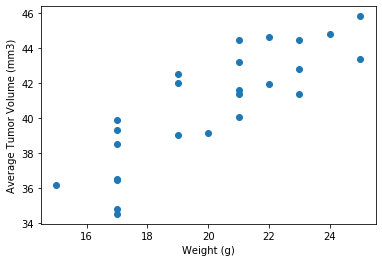

In [59]:
plt.scatter(mice_weights, mice_volumes)

plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")

### Correlation and Regression

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [61]:
print(f"The correlation between weight and the average tumot volume is {round(st.pearsonr(mice_weights,mice_volumes)[0],2)}")

The correlation between weight and the average tumot volume is 0.84


The r-squared is: 0.7088568047708717


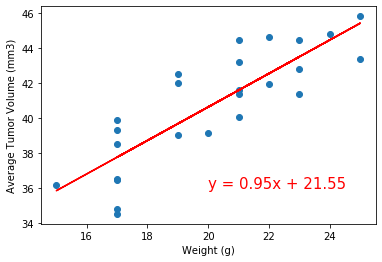

In [62]:
x_values = mice_weights
y_values = mice_volumes
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()